In [1]:
import pandas as pd
dataset=pd.read_csv("axisbank_stock_data.csv", parse_dates=['Date'], index_col='Date')

In [2]:
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-05,711.900024,730.900024,707.750000,726.900024,723.746582,11312955
2022-01-06,719.950012,733.500000,719.000000,730.299988,727.131836,7955578
2022-01-07,734.000000,740.900024,725.250000,730.599976,727.430481,10454143
2022-01-10,733.650024,744.000000,733.200012,742.799988,739.577576,9595787
2022-01-11,742.900024,747.049988,737.299988,743.250000,740.025635,7252279
...,...,...,...,...,...,...
2023-01-03,944.750000,965.599976,942.599976,962.299988,959.583801,6927819
2023-01-04,963.500000,970.000000,955.000000,957.450012,954.747498,9059392
2023-01-05,960.000000,961.900024,938.250000,949.549988,946.869812,6998980


In [3]:
#Start date and end_date
from datetime import date, timedelta
import pandas as pd
start_date = pd.to_datetime("2022-01-05")
end_date = pd.to_datetime("2023-01-10") - timedelta(days=1) #Excluding last

#List of all dates
all_date = pd.date_range(start_date, end_date, freq='d')

In [22]:
all_date

DatetimeIndex(['2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14',
               ...
               '2022-12-31', '2023-01-01', '2023-01-02', '2023-01-03',
               '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07',
               '2023-01-08', '2023-01-09'],
              dtype='datetime64[ns]', length=370, freq='D')

In [4]:
dummyDate=dataset

In [6]:
all_date_truncated = all_date[:len(dummyDate)]

# Now set the index
dummyDate.index = all_date_truncated

In [7]:
print(f"Length of dummyDate: {len(dummyDate)}")
print(f"Length of all_date: {len(all_date)}")

Length of dummyDate: 252
Length of all_date: 370


In [8]:
dummyDate

,Open,High,Low,Close,Adj Close,Volume
2022-01-05,711.900024,730.900024,707.750000,726.900024,723.746582,11312955
2022-01-06,719.950012,733.500000,719.000000,730.299988,727.131836,7955578
2022-01-07,734.000000,740.900024,725.250000,730.599976,727.430481,10454143
2022-01-08,733.650024,744.000000,733.200012,742.799988,739.577576,9595787
2022-01-09,742.900024,747.049988,737.299988,743.250000,740.025635,7252279
...,...,...,...,...,...,...
2022-09-09,944.750000,965.599976,942.599976,962.299988,959.583801,6927819
2022-09-10,963.500000,970.000000,955.000000,957.450012,954.747498,9059392
2022-09-11,960.000000,961.900024,938.250000,949.549988,946.869812,6998980
2022-09-12,946.549988,950.950012,934.299988,939.900024,937.247070,5787783


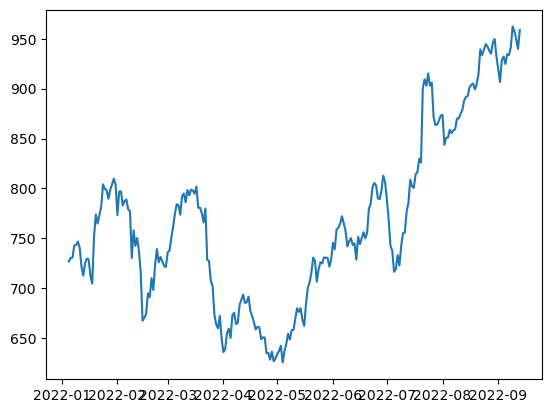

In [9]:
import matplotlib.pyplot as plt
plt.plot(dataset["Close"])

<Figure size 1600x500 with 0 Axes>

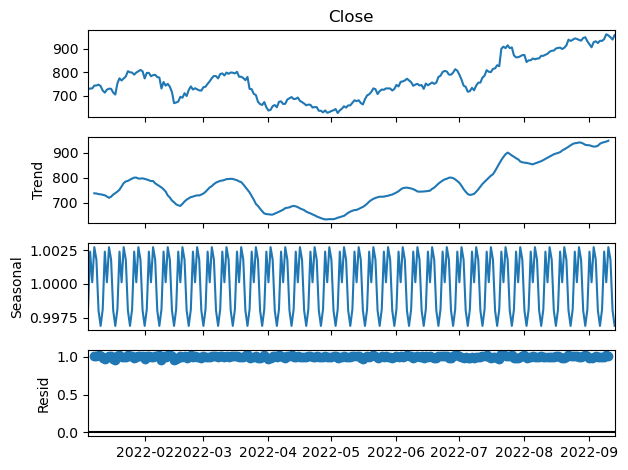

In [10]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummyDate["Close"], model='multiplicative')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

<Figure size 1600x500 with 0 Axes>

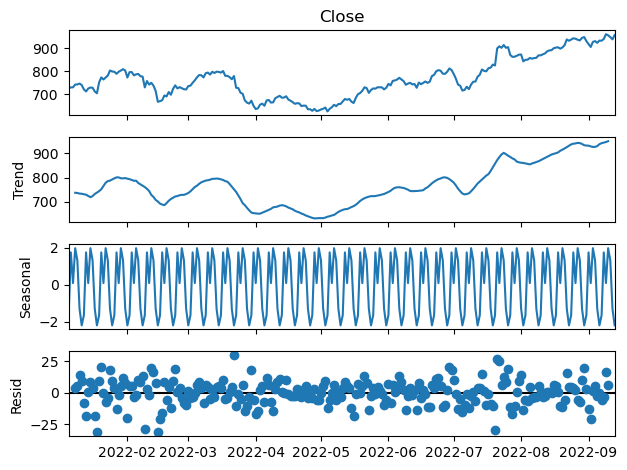

In [11]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummyDate["Close"], model='additive')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

In [12]:
# ADF Test
# Function to print out results in customised manner
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries,df,pollutant):
    plt.figure(figsize=(16,5))
    # Plot the data
    # ADF Test
    # Function to print out results in customised manner
    from statsmodels.tsa.stattools import adfuller
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    ans=dfoutput
    print("Condition:")
    print("p-value<=0.05-->Accept Alternate Hypothesis")
    print("p-value>0.05-->Accept Null Hypothesis")
    if(ans['Test Statistic']<ans["Critical Value (1%)"] or ans['Test Statistic']<ans["Critical Value (5%)"] or ans['Test Statistic']<ans["Critical Value (10%)"] and ans["p-value"]<0.05):
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Reject null hypothesis:Non Stationarity")
        print("Accept Alternate hypothesis:Staionarity ")
        message="Stationarity based on ADH"
    else:
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Accept null hypothesis:Non Stationarity" )
        print("Reject Alternate hypothesis:Staionarity ")
        message="Non-stationarity based on ADH"
        
    plt.plot(df.index, df[pollutant], label = pollutant)
    plt.legend(loc='best')
    plt.title("{}_{}_2013 to 2021".format(message,pollutant))
    plt.savefig("{}_ADH.png".format(pollutant))
    plt.show()
    
    return message
    
# Call the function and run the test

Results of Dickey-Fuller Test:
Test Statistic                  -0.517242
p-value                          0.888608
#Lags Used                       2.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64
Condition:
p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis
Accept null hypothesis:Non Stationarity
Reject Alternate hypothesis:Staionarity 


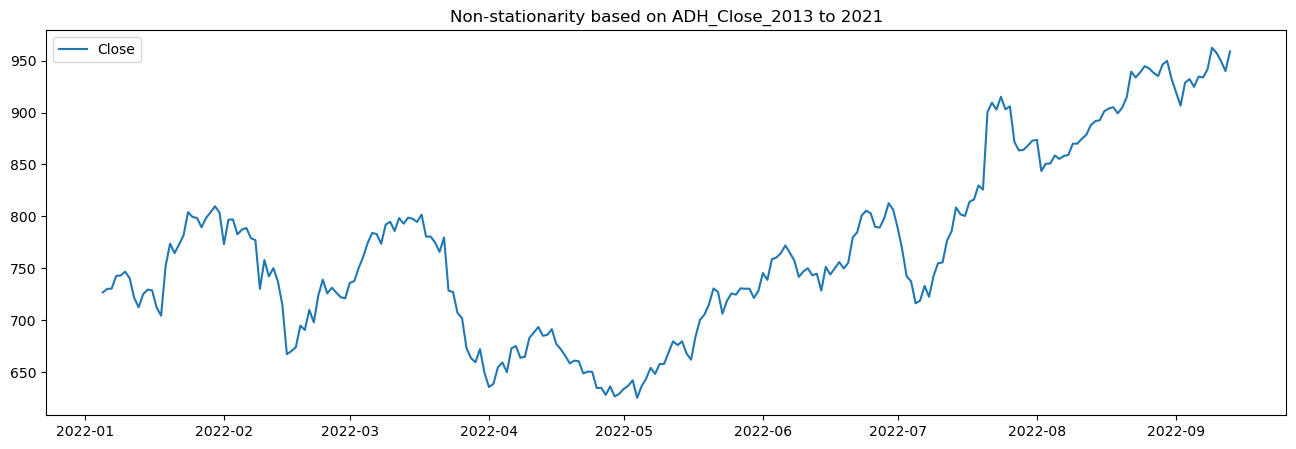

'Non-stationarity based on ADH'

In [13]:
adf_test(dataset["Close"],dataset,"Close")

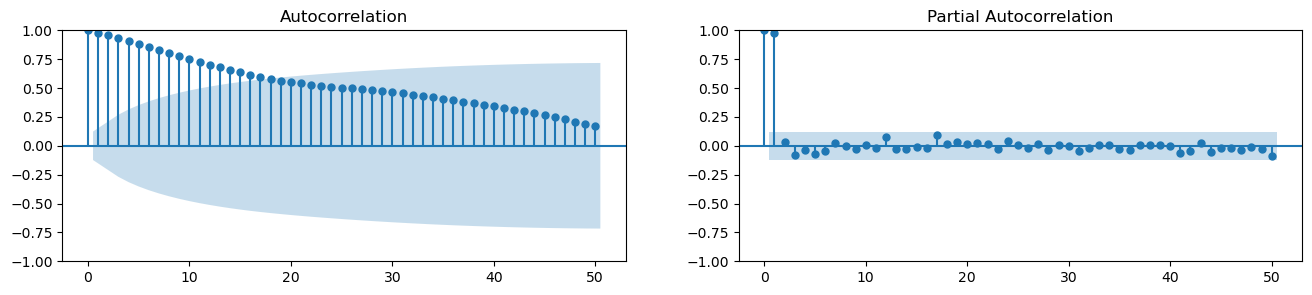

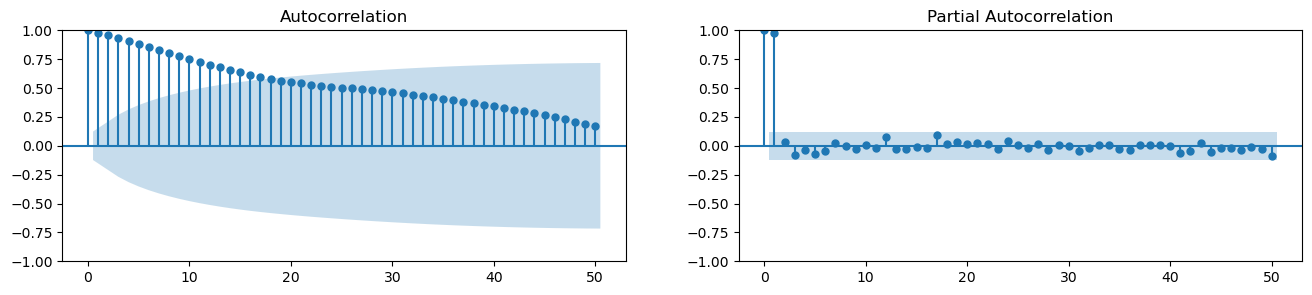

In [14]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(dataset.Close.tolist(), lags=50, ax=axes[0])
plot_pacf(dataset.Close.tolist(), lags=50, ax=axes[1])

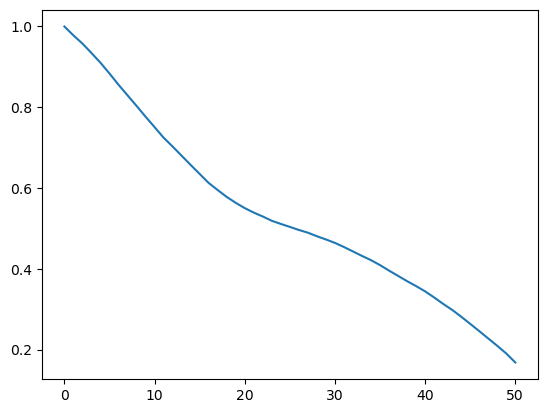

In [15]:
plt.plot(acf(dataset["Close"],nlags=50))

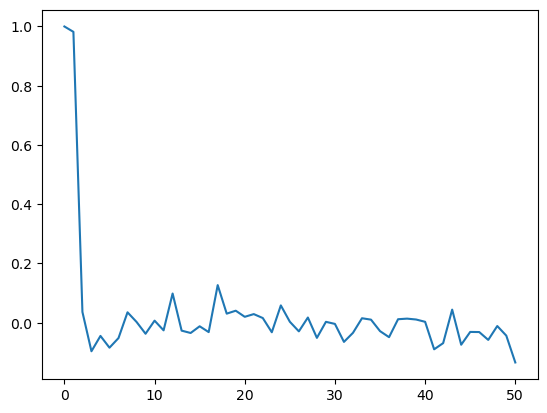

In [16]:
plt.plot(pacf(dataset["Close"],nlags=50))

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

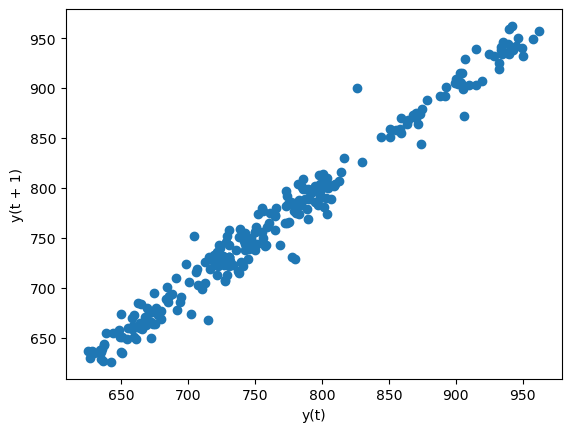

In [17]:
from pandas.plotting import lag_plot
lag_plot(dataset["Close"],lag=1)

In [18]:
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

In [19]:
import numpy as np
print(ApEn(dataset["Close"], m=2, r=0.2*np.std(dataset["Close"])))

0.4736710984136505


C:\Users\Manikandan\AppData\Local\Temp\ipykernel_6196\2578661817.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]


In [20]:
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

In [21]:
print(SampEn(dataset["Close"], m=2, r=0.2*np.std(dataset["Close"])))

0.4487654186428866


C:\Users\Manikandan\AppData\Local\Temp\ipykernel_6196\1392444303.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
